# 

# Visualization with ggplot2

The package **ggplot2** \[@R-ggplot2\] is another useful package in the
**tidyverse** that allows statisticians to use visualizations to
communicate key findings and results in a compelling format. In this
chapter, we learn about the three main components in a ggplot object and
then expand on that format by learning more about the different layers
we can use to create various plots. As with the **dplyr** functions,
there are many functions to cover, and they build upon one another.

The three packages we use in this chapter are **tidyverse**,
**HDSinRdata**, and **patchwork** \[@R-patchwork\], the last of which is
a nice package for combining multiple plots together into a single
figure. We use the data from the Pittsburgh pain clinic
\[@alter2021hierarchical\] introduced in **?@sec-data-files** to create
our visuals. You can refresh your memory about this data by reading the
data documentation. For the purposes of this chapter, we take a sample
of 5,000 patients that are complete cases at baseline to reduce the
computation time to display each plot. You can ignore how the code used
to find this sample works.

In [ ]:
library(tidyverse)
library(HDSinRdata)
library(patchwork)
data(pain)

# sampling data
set.seed(5)
pain_df_sub <- subset(pain, 
                      select = -c(PAIN_INTENSITY_AVERAGE.FOLLOW_UP))
pain_df <- pain[complete.cases(pain_df_sub), ]
pain_df <- pain_df[sample(1:nrow(pain_df), 5000, replace = FALSE),] 

## Intro to ggplot

We’ll begin by demonstrating how to create a scatter plot in **ggplot2**
to introduce the three key elements of a `ggplot2` object. Specifically,
we create a scatter plot of a patient’s depression vs. anxiety score. To
start a graph, we can use the `ggplot()` function to create a `ggplot`
object as shown in the following code. Note that this brings up a gray
box; this is the base that we build up from.

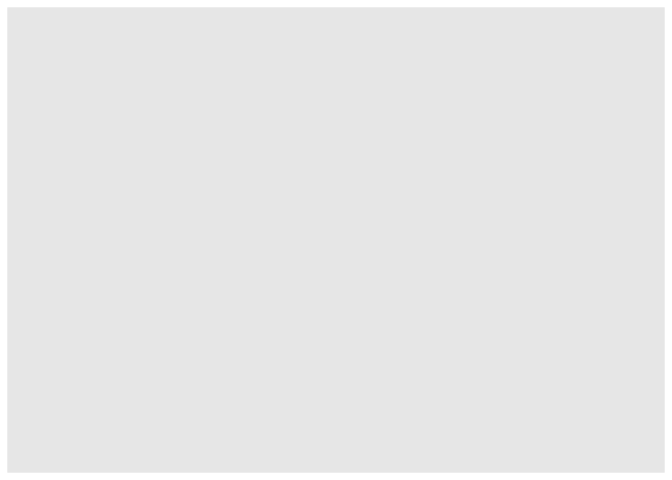

In [ ]:
ggplot()

Next, we can begin adding layers to our `ggplot` object. One type of
layer is a **geom**, which creates a geometric object. In the next code
chunk, we use the `geom_point()` function to add a scatter plot layer.
For this function, we first need to specify which data we want to use,
and then we need to tell R how to use that data to create the scatter
plot using the `aes()` function, which creates an **aesthetic**. For a
scatter plot, we need to at least specify the x-axis and y-axis in the
aesthetic. Both the data and the aesthetic can either be specified in
our initial `ggplot()` function, which passes this information to all
future layers, or in the `geom_point()` function itself. In the
following code, we specify the aesthetic in the geom function but also
include two alternative ways to code the same image in the subsequent
code chunk. The resulting plot shows a fairly linear relationship
between anxiety and depression.

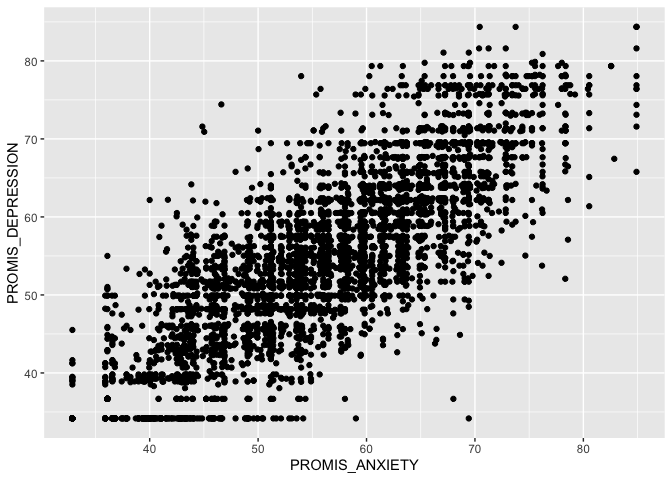

In [ ]:
ggplot(pain_df) + geom_point(aes(x=PROMIS_ANXIETY, 
                                 y = PROMIS_DEPRESSION))

In [ ]:
# Alternative 1:
ggplot(pain_df, aes(x = PROMIS_ANXIETY, y = PROMIS_DEPRESSION)) + 
  geom_point()
# Alternative 2:
ggplot() + 
  geom_point(data = pain_df, aes(x = PROMIS_ANXIETY, 
                                 y = PROMIS_DEPRESSION))

If we want to improve our plot, we may want to add different labels and
a title. To do so, we use the `labs()` function to add a layer in which
we can specify all labels. Additionally, I have passed more information
to the geometry layer by changing the color, size, and shape of the
points. These things are specified outside of the `aes()` function since
they do not come from the data; every point has the same color, size,
and shape in this example.

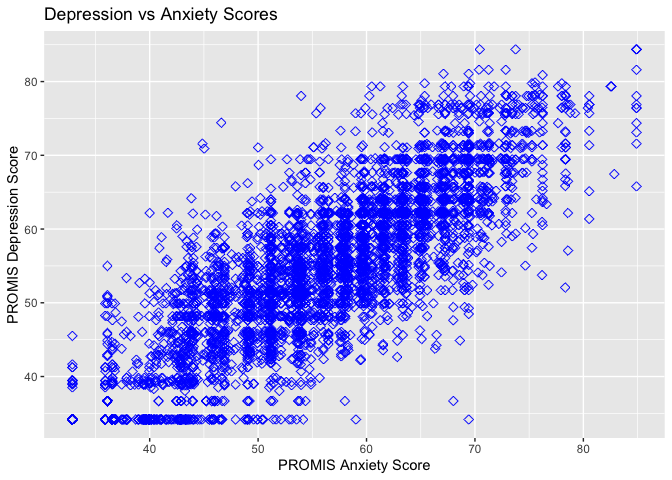

In [ ]:
ggplot(pain_df)+
  geom_point(aes(x = PROMIS_ANXIETY, y = PROMIS_DEPRESSION), 
             color = "blue", size = 2, shape = 5) + 
  labs(x = "PROMIS Anxiety Score", y = "PROMIS Depression Score", 
       title = "Depression vs Anxiety Scores")

Let’s create another example. This time, I create a histogram for
initial recorded pain level. To find the corresponding geom for the type
of plot we’d like to make, we can use the [data visualization cheat
sheet from
Posit](https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf).
The first page lists all the geom options available along with what
aesthetics we can set for each option. For example, here we are
interested in plotting the distribution of one continuous variable, and
under the `geom_histogram()` function we can see that we can specify `x`
(the variable whose distribution we want to plot) as well as `binwidth`,
`y`, `alpha`, `color`, `fill`, `linetype`, `size`, and `weight`. By
default, the `y` value in a histogram is the count for each bin.

In the following code, you can see that we updated the color (`color`),
fill (`fill`), and opacity (`alpha`) of our histogram bars and updated
the number of bins to be 11 (to account for the possible values 0-10).
Additionally, we used the `theme_minimal()` function to change the
background colors used. You can find the available themes on the second
page of the cheat sheet. Try changing the theme of the following plot to
`theme_bw()`.

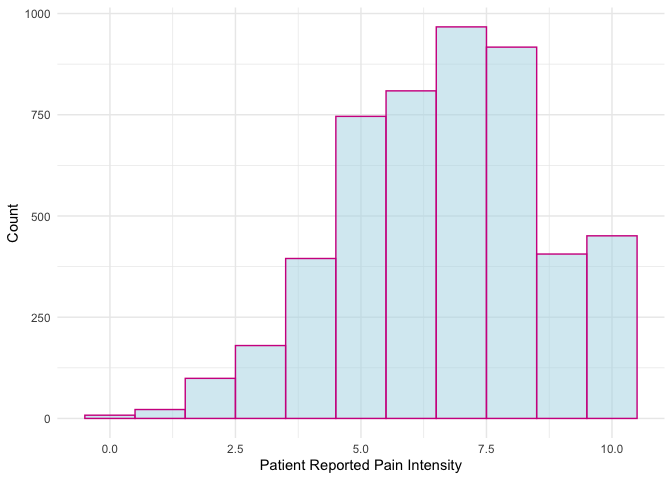

In [ ]:
ggplot(pain_df)+
  geom_histogram(aes(x = PAIN_INTENSITY_AVERAGE), color = "violetred", 
                 fill = "lightblue", alpha = 0.5, bins = 11) +
  labs(x = "Patient Reported Pain Intensity", y = "Count")+
  theme_minimal()

### Practice Question

Recreate <a href="#fig-line-plot" class="quarto-xref">Figure 1</a>.

<figure id="fig-line-plot">
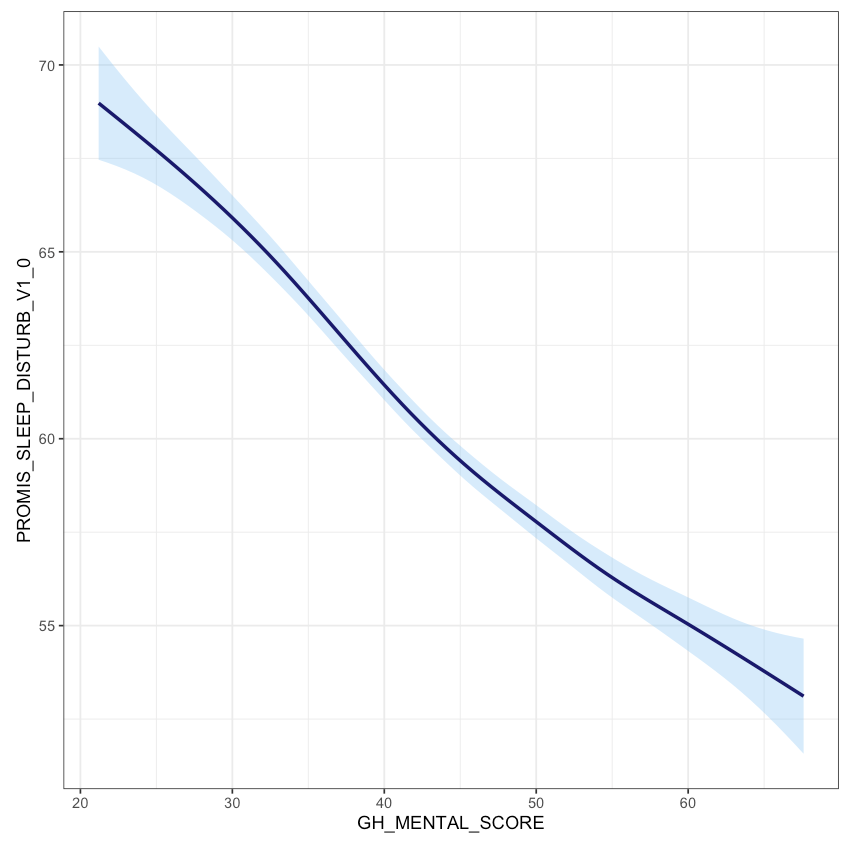
<figcaption>Figure 1: Line Plot.</figcaption>
</figure>

In [ ]:
# Insert your solution here: 

## Adjusting the Axes and Aesthetics

We can further control how each aesthetic element is displayed using
*scale* functions. For example, suppose that I want to update the
previous plot. In particular, I first want to update the x-axis to
display all of the values 0 to 10 instead of 0, 2.5, 5, etc.. To update
the x-axis, I need to find the corresponding scale function for x with
continuous values. This function is `scale_x_continuous()`, which allows
me to specify limits (`limits`), breaks (`breaks`), and labels
(`labels`). The scale functions can be found on the second sheet of the
cheat sheet. In this case, I just want to update the breaks to be all
integer values from 0 to 10.

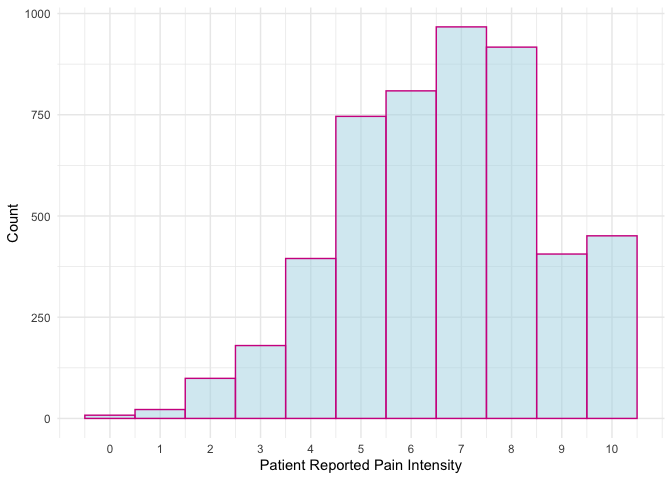

In [ ]:
ggplot(pain_df)+
  geom_histogram(aes(x = PAIN_INTENSITY_AVERAGE), color = "violetred", 
                 fill = "lightblue", alpha = 0.5, bins = 11) +
  labs(x = "Patient Reported Pain Intensity", y = "Count")+
  scale_x_continuous(breaks = 0:10)+
  theme_minimal()

Now, let’s take a more complex example. The following plot shows each
patient’s reported sleep disturbance vs. physical function and colors
each point by their reported pain intensity. Since some points might
overlap in values, we added `position="jitter"` to the `geom_point()`
function to jitter the points, which corresponds to adding some random
noise to each point’s position. As presented, this plot is difficult to
interpret. For example, the color of pain intensity makes it hard to see
how pain changes, and the legend title needs to be simpler.

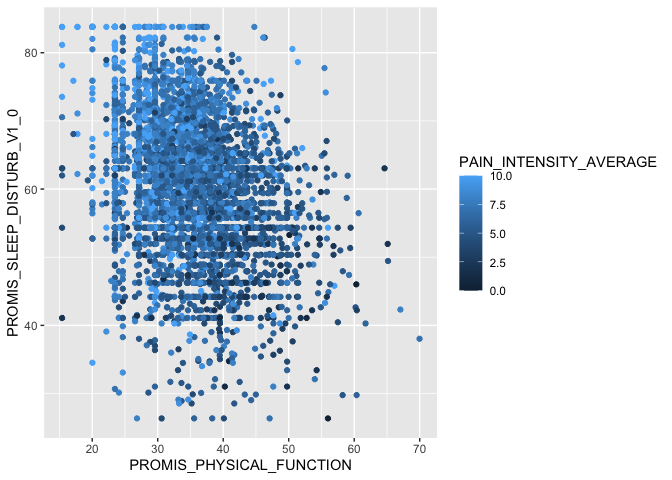

In [ ]:
ggplot(pain_df)+
  geom_point(aes(x = PROMIS_PHYSICAL_FUNCTION, 
                 y = PROMIS_SLEEP_DISTURB_V1_0, 
                 color = PAIN_INTENSITY_AVERAGE), position="jitter")

Suppose that we wanted to visualize the pain intensity and sleep
disturbance for patients with below-average physical function. Note that
both sleep disturbance and physical function are reported as T-Scores,
meaning that the raw scores have been converted to a standardized score
with mean 50 and standard deviation 10 within the population. We can use
the scale functions to update our axes and labels to reflect this
information. As before, we need to use the `scale_x_continuous()`
function to update the x-axis for a continuous variable. In this case,
we update the limits (to restrict to below-average physical function),
breaks, and labels. We similarly update the y-axis.

Lastly, suppose we want to update the color aesthetic. As before, this
aesthetic corresponds to a continuous variable. The cheat sheet provides
several possible scale functions depending on how we want to specify the
color gradient. We choose the `scale_color_gradient()` function, since
this allows us to specify the low and high end colors. We can also
specify the breaks for the legend values similar to how we specified the
breaks for the x- and y-axes. The argument `name` also allows us to
rename this legend. The palette then converts this to a continuous color
gradient. Note that in contrast to the `scale_color_gradient()` function
that we chose to use for this example, the functions
`scale_color_gradient2()` and `scale_color_gradientn()` allow you to
specify more color points in the gradient rather than just the two
extreme colors.

We can observe that decreased physical function is associated with
higher sleep disturbance, and that those with worse physical function
and worse sleep disturbance tend to have higher reported pain. Note that
this time we receive a warning message, which is because our axis limits
have cut off some points. To avoid this message, we could use the
function `coord_cartesian()` to specify our limits which clips the
values rather than removing points outside the limits.

(`geom_point()`).

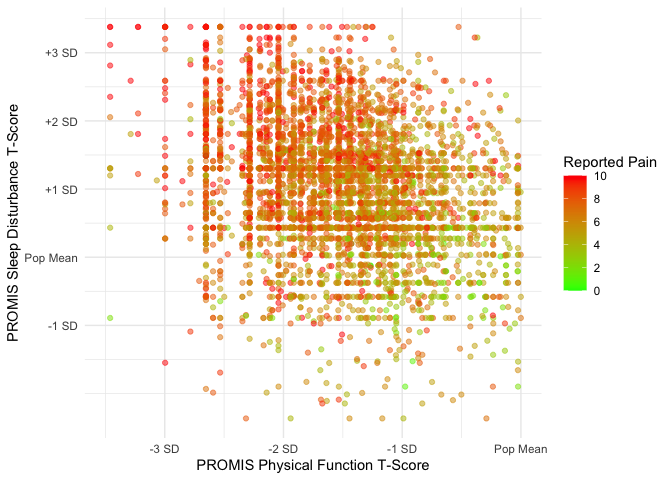

In [ ]:
ggplot(pain_df)+
  geom_point(aes(x = PROMIS_PHYSICAL_FUNCTION, 
                 y = PROMIS_SLEEP_DISTURB_V1_0, 
                 color = PAIN_INTENSITY_AVERAGE), 
             position = "jitter", alpha = 0.5) +
  scale_x_continuous(limits = c(15,50), breaks = c(20, 30, 40, 50), 
                     labels = c("-3 SD", "-2 SD", "-1 SD", 
                                "Pop Mean")) + 
  scale_y_continuous(breaks = c(40, 50, 60, 70, 80), 
                     labels = c("-1 SD", "Pop Mean", "+1 SD", "+2 SD", 
                                "+3 SD")) +
  scale_color_gradient(breaks = seq(0,10,2), low = "green", 
                       high = "red", "Reported Pain") +
  labs(x = "PROMIS Physical Function T-Score", 
       y = "PROMIS Sleep Disturbance T-Score") + 
  theme_minimal()

We now demonstrate these scale functions for discrete variables. In the
subsequent example, we first create a new race variable that has only
three categories since other groups have limited observations. We then
create a boxplot for pain intensity by race. There are two discrete
aesthetics here: color and the y-axis. This plot shows a higher median
pain for black patients compared to other races.

In [ ]:
pain_df$PAT_RACE_CAT <- ifelse(pain_df$PAT_RACE %in% c("BLACK", 
                                                       "WHITE"), 
                               pain_df$PAT_RACE, "OTHER")
pain_df$PAT_RACE_CAT <- as.factor(pain_df$PAT_RACE_CAT)

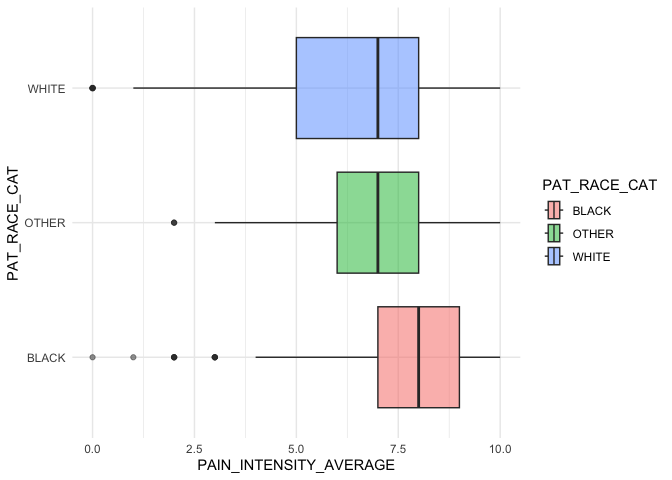

In [ ]:
ggplot(pain_df)+
  geom_boxplot(aes(y = PAT_RACE_CAT, x = PAIN_INTENSITY_AVERAGE, 
                   fill = PAT_RACE_CAT), alpha = 0.5) +
  theme_minimal()

The function `scale_y_discrete()` is the scale function that corresponds
to a discrete y-axis. In this case, we want to update the order and
labels of this y-axis. To update the order, we can either re-factor the
variable using `factor()` prior to plotting or update the `limits`
argument of the scale function. The function `scale_fill_brewer()` is a
scale function to control the color palette of a discrete variable used
for the fill aesthetic. We use this function to specify the color
palette (`palette`) and to specify that we do not want a legend
(`guide`). Since we do not have a legend, we do not update the values
and labels in this function.

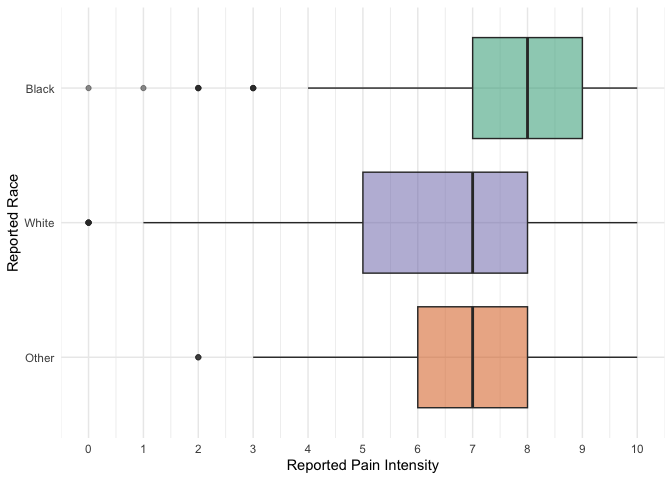

In [ ]:
ggplot(pain_df)+
  geom_boxplot(aes(y = PAT_RACE_CAT, x = PAIN_INTENSITY_AVERAGE, 
                   fill = PAT_RACE_CAT), alpha = 0.5) +
  scale_x_continuous(breaks = c(0:10)) +
  scale_y_discrete(limits = c("OTHER", "WHITE", "BLACK"), 
                   labels = c("Other", "White", "Black")) +
  scale_fill_brewer(palette = "Dark2", guide = "none") +
  labs(x = "Reported Pain Intensity", y = "Reported Race") +
  theme_minimal()

The **RColorBrewer** package \[@R-RColorBrewer\] contains several
default palettes to choose from, shown in the following output. You can
also create your own palette using the `brewer.pal()` function from this
package. To visualize a palette, you can use the available [online
tool](https://colorbrewer2.org/).

In [ ]:
library(RColorBrewer)
display.brewer.all()

<figure>
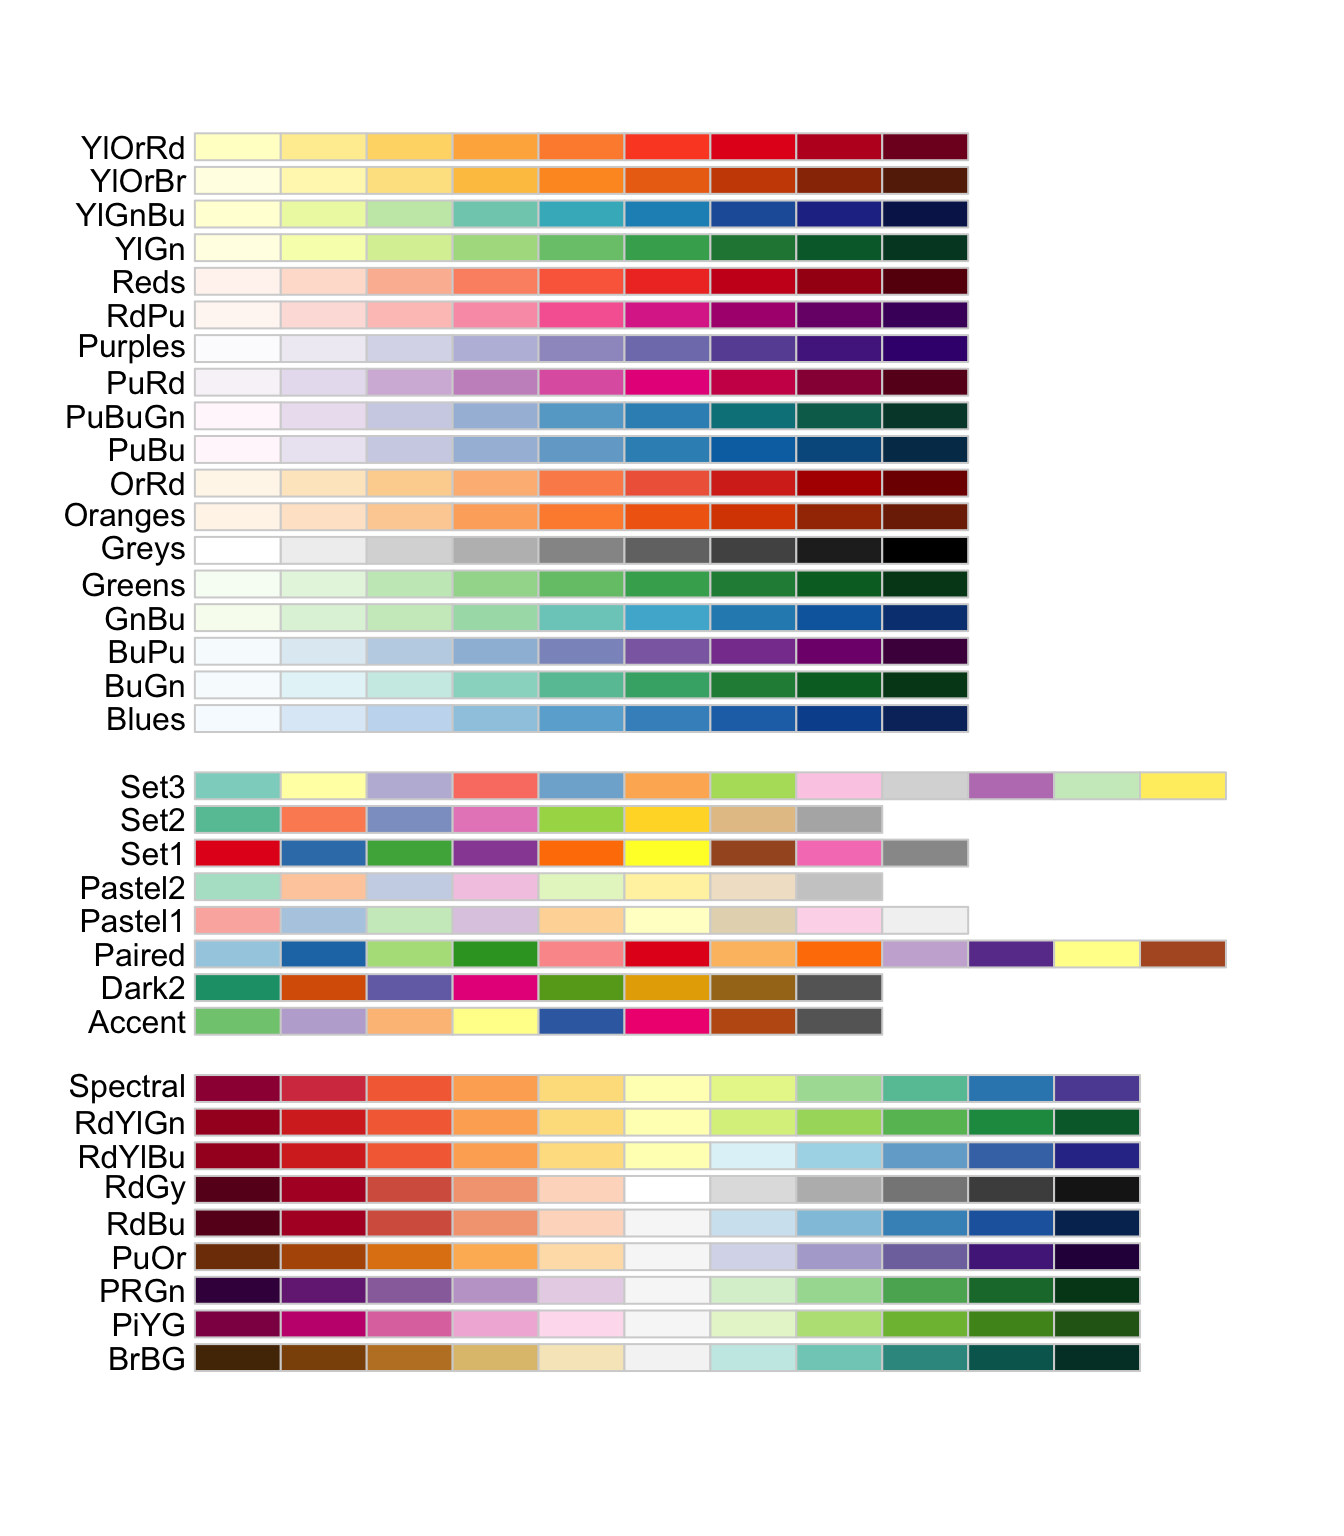
<figcaption aria-hidden="true"><strong>RColorBrewer</strong>
Palettes.</figcaption>
</figure>

Here is one more example of how you can use the scale functions; take a
look at the next plot example. We used two `geom_histogram()` calls, or
layers, to plot a histogram of pain at baseline and at follow-up. This
allows us to visualize that pain at follow-up tends to be lower than at
baseline.

We also specify the fill to be by “Baseline” and “Follow-up” within the
aesthetic, even though this isn’t a column in the data: this is a sort
of manual way to color the bars. We use the `scale_fill_manual()`
function to then specify the colors we want to use for these two
categories using the `values` argument. We received three warnings when
creating this plot! This is because we have many NA values for follow-up
and because we did not specify the bin size for either histogram. C’est
la vie.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

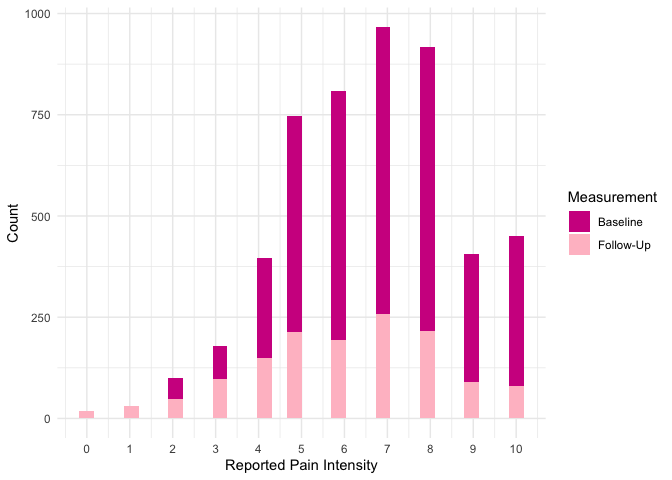

In [ ]:
ggplot(pain_df)+
  geom_histogram(aes(x = PAIN_INTENSITY_AVERAGE, fill = "Baseline")) +
  geom_histogram(aes(x = PAIN_INTENSITY_AVERAGE.FOLLOW_UP, 
                     fill = "Follow-Up")) +
  scale_x_continuous(breaks = c(0:10)) + 
  scale_fill_manual(values = c("violetred", "pink"), 
                    name = "Measurement") +
  labs(x = "Reported Pain Intensity", y = "Count") +
  theme_minimal()

## Adding Groups 

In the previous example, we created two histograms using two calls to
the `geom_histogram()` function. However, there is another way to create
multiple layers like this when you want to separate the geom layer based
on a variable. For example, suppose we want to visualize the
distribution of physical function by whether someone has follow-up
information. In the following code, we create the variable
`HAS_FOLLOW_UP` before using it in our aesthetic for `geom_density()` as
both the color and group. In fact, we do not have to add the `group`
argument because as soon as we specify to **ggplot** that we want to
color the density plots by this variable, it creates the grouping.
Finally, we update the legend for this grouping using the
`scale_color_discrete()` function, as the discrete variable
`HAS_FOLLOW_UP` determines the color.

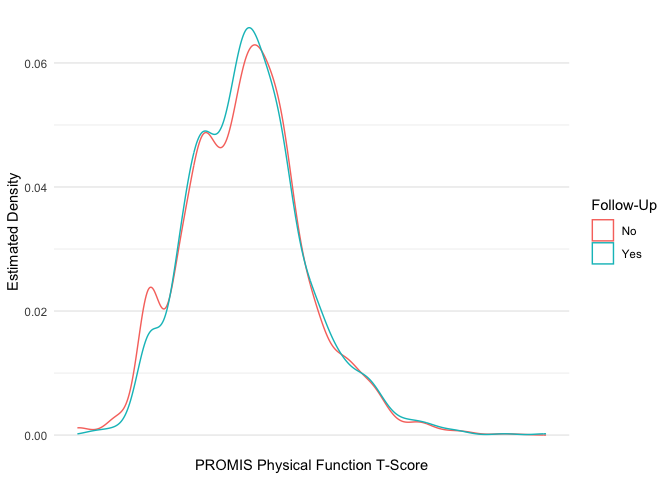

In [ ]:
pain_df$HAS_FOLLOW_UP <- 
  !is.na(pain_df$PAIN_INTENSITY_AVERAGE.FOLLOW_UP)
ggplot(pain_df) +
  geom_density(aes(x = PROMIS_PHYSICAL_FUNCTION, 
                   group = HAS_FOLLOW_UP, 
                   color= HAS_FOLLOW_UP)) +
  scale_x_continuous(breaks = c(0:10)) + 
  scale_color_discrete(name = "Follow-Up", labels = c("No", "Yes")) +
  labs(x = "PROMIS Physical Function T-Score", 
       y = "Estimated Density") +
  theme_minimal()

Let’s try another example. Suppose that we want to find the distribution
of initial overall pain by those that do and do not have a follow-up. In
this case, we want to plot the proportion of each pain score for each
group rather than compare counts. We first need to find these
proportions, which we do by grouping and summarizing over our data.

In [ ]:
pain_df_grp <- pain_df %>%
  group_by(HAS_FOLLOW_UP, PAIN_INTENSITY_AVERAGE) %>%
  summarize(tot = n()) %>%
  mutate(prop = tot/sum(tot)) %>%
  ungroup()

`summarise()` has grouped output by 'HAS_FOLLOW_UP'. You can override using the
`.groups` argument.

# A tibble: 6 × 4
  HAS_FOLLOW_UP PAIN_INTENSITY_AVERAGE   tot    prop
  <lgl>                          <dbl> <int>   <dbl>
1 FALSE                              0     8 0.00222
2 FALSE                              1    16 0.00444
3 FALSE                              2    62 0.0172 
4 FALSE                              3   132 0.0366 
5 FALSE                              4   273 0.0757 
6 FALSE                              5   508 0.141  

We can now use the `geom_col()` function to create a barplot of these
proportions. By default, this function stacks the bars on top of each
other when there is grouping. Try adding `position="dodge"` to the
`geom_col()` function to place the bars side by side instead of on top
of each other.

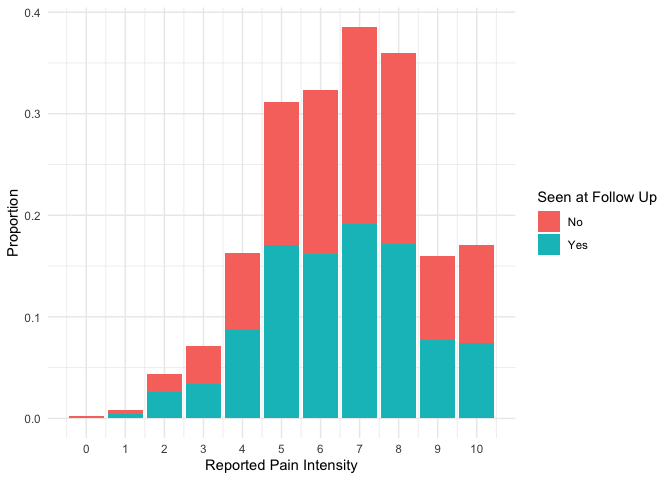

In [ ]:
ggplot(pain_df_grp)+
  geom_col(aes(x = PAIN_INTENSITY_AVERAGE, y = prop, 
               fill = HAS_FOLLOW_UP)) +
  scale_x_continuous(breaks = c(0:10)) + 
  scale_fill_discrete(name = "Seen at Follow Up", 
                      labels = c("No", "Yes")) +
  labs(x = "Reported Pain Intensity", y = "Proportion") +
  theme_minimal()

### Practice Question

Recreate
<a href="#fig-bmi-distribution" class="quarto-xref">Figure 2</a>.

<figure id="fig-bmi-distribution">
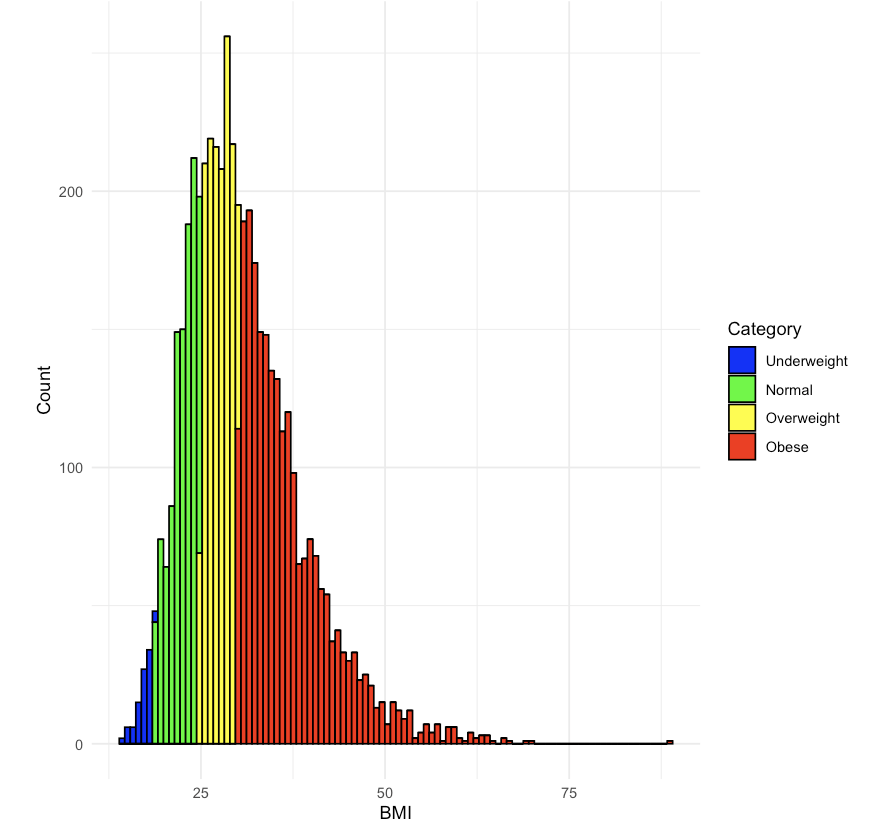
<figcaption>Figure 2: BMI Distribution.</figcaption>
</figure>

In [ ]:
# Insert your solution here:

Another way to visualize data by group is to add a facet wrap to your
ggplot object. Facets divide a plot into subplots based on one or more
discrete variable values. We can arrange these plots as a grid where the
rows and/or columns correspond to the variables we are grouping by using
`facet_grid()` and specifying the column and row variables using the
`col` and `row` arguments respectively. Or we can wrap the plots into a
rectangular format using `facet_wrap()` and specifying the columns using
the `facet` argument. In the following code, we take one of our previous
plots and add a facet grid where the columns of the grid are given by a
racial group. If we had set `row=vars(PAT_RACE_CAT)`, then this would
stack the plots vertically. Note that we have to specify the variables
inside the `vars()` function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

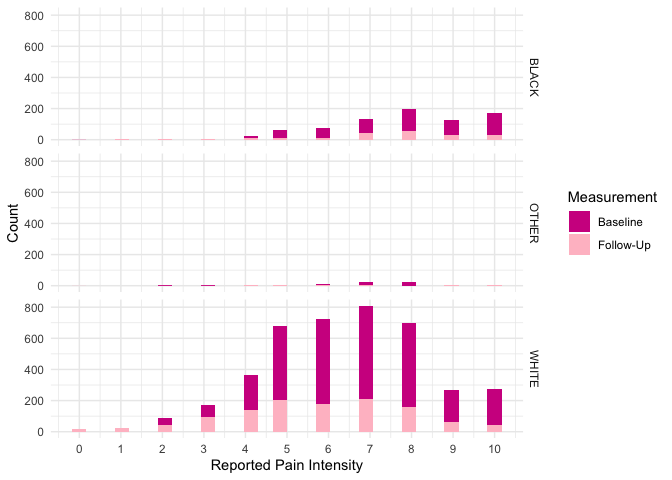

In [ ]:
ggplot(pain_df)+
  geom_histogram(aes(x = PAIN_INTENSITY_AVERAGE, fill = "Baseline")) +
  geom_histogram(aes(x = PAIN_INTENSITY_AVERAGE.FOLLOW_UP, 
                     fill = "Follow-Up")) +
  scale_x_continuous(breaks = c(0:10)) + 
  scale_fill_manual(values = c("violetred", "pink"), 
                    name = "Measurement") +
  labs(x= "Reported Pain Intensity", y = "Count") +
  facet_grid(row = vars(PAT_RACE_CAT))+
  theme_minimal()

## Extra Options

For our final plot, we will demonstrate additional features not yet
covered in this chapter. To create this plot, we first find the number
of participants who selected each body region as well as the average
pain intensity for those patients. We also classify each body part
region into larger groups.

In [ ]:
pain_body_map <- data.frame(part = names(pain_df)[2:75])
pain_body_map$num_patients <- colSums(pain_df[, 2:75])
pain_body_map$perc_patients <- pain_body_map$num_patients / 
                               nrow(pain_df)
pain_body_map$avg_pain <- colSums(pain_df[, 2:75] * 
                                pain_df$PAIN_INTENSITY_AVERAGE) /
                                pain_body_map$num_patients
pain_body_map <- pain_body_map %>% 
    mutate(region = case_when(
    part %in% c("X208", "X209", "X218", "X219", "X212",
                "X213") ~ "Back",
    part %in% c("X105", "X106", "X205", "X206") ~ "Neck",
    part %in% c("X107", "X110", "X207", "X210") ~ "Shoulders",
    part %in% c("X108", "X109", "X112", "X113") ~ "Chest/Abs",
    part %in% c("X126", "X127", "X228", "X229",
                "X131", "X132", "X233", "X234") ~ "Legs",
    part %in% c("X111", "X114", "X211", "X214", "X115", "X116",
                "X117", "X118", "X217", "X220") ~ "Arms",
    part %in% c("X119", "X124", "X221", "X226", "X125", "X128",
                "X227", "X230") ~ "Wrists/Hands",
    part %in% c("X215", "X216") ~ "Elbows",
    part %in% c("X135", "X136", "X237", "X238", "X133", "X134",
                "X235", "X236") ~ "Feet/Ankles",
    part %in% c("X129", "X130", "X231", "X232") ~ "Knees",
    part %in% c("X101", "X102", "X103", "X104", "X201", "X203",
                "X202", "X204") ~ "Head",
    part %in% c("X120", "X121", "X122", "X123", "X222", "X223",
                "X224", "X225") ~ "Hips"))
    
head(pain_body_map)

  part num_patients perc_patients avg_pain region
1 X101          323        0.0646 6.693498   Head
2 X102          322        0.0644 6.819876   Head
3 X103          165        0.0330 6.860606   Head
4 X104          165        0.0330 6.951515   Head
5 X105          493        0.0986 6.904665   Neck
6 X106          507        0.1014 6.921105   Neck

Within the theme we’ve chosen, we are able to update any of the theme
options (see `?theme`). In the following code, we use the `theme()`
function to update the legend position to the bottom and the grid lines
to light pink. Additionally, we add a horizontal line using the
`geom_hline()` function (`geom_vline()` and `geom_abline()` can add
vertical or diagonal lines, respectively) and add a text annotation
using the `annotate()` function. The resulting plot shows the average
pain value for each body part as well as the proportion of patients who
categorized it as being painful.

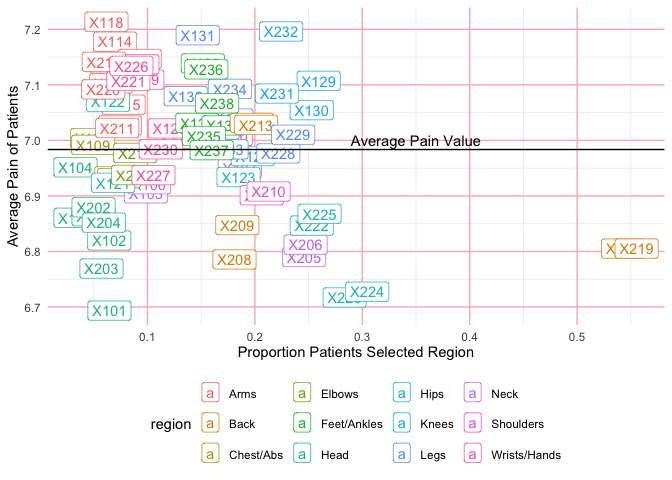

In [ ]:
ggplot(pain_body_map) +
  geom_label(aes(x = perc_patients, y = avg_pain, label = part, 
                 color = region)) + 
  geom_hline(yintercept = mean(pain_body_map$avg_pain)) +
  annotate(geom = "text", label = "Average Pain Value", 
           x = 0.35, y = 7.0) + 
  labs(x = "Proportion Patients Selected Region", 
       y = "Average Pain of Patients") +
  theme_minimal()+
  theme(legend.position="bottom", 
        panel.grid.major = element_line(color = "lightpink"))

So far, we have not saved any of our figures as objects. In the next
example, I create two plots and save them as objects named `p1` and
`p2`. If we want to save these plots, we can use the `ggsave()`
function, which saves the last plot generated under the file name
provided. Additionally, I can use the **patchwork** package to
incorporate multiple plots together. A `+` between plots adds them
together into a single figure, and then the `plot_layout()` function
allows us to specify the grid used to arrange our figures. We have added
an extra element using the `guide_area()` function to create a
placeholder for the legends and then used the `guide = "collect"`
argument in the `plot_layout()` function to specify that all guides
should be put together.

In [ ]:
p1 <- ggplot(pain_body_map) +
  geom_label(aes(x = perc_patients, y = avg_pain, label = part, 
                 color = region)) + 
  geom_hline(yintercept = mean(pain_body_map$avg_pain)) +
  annotate(geom = "text", label = "Average Pain Value", 
           x = 0.35, y = 7.0) + 
  labs(x = "Proportion of Patients Selecting Region", 
       y = "Average Pain of Patients") +
  scale_color_discrete(name="Body Part")+
  theme_minimal()+
  theme(legend.position = "bottom", 
        panel.grid.major = element_line(color = "lightpink"))

p2 <- ggplot(pain_body_map) +
  geom_histogram(aes(x = perc_patients), color = "violetred", 
                 fill = "lightpink") + 
  labs(x = "Proportion of Patients Selecting Region", y = "Count") +
  theme_minimal()+
  theme(panel.grid.major = element_line(color = "lightpink"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

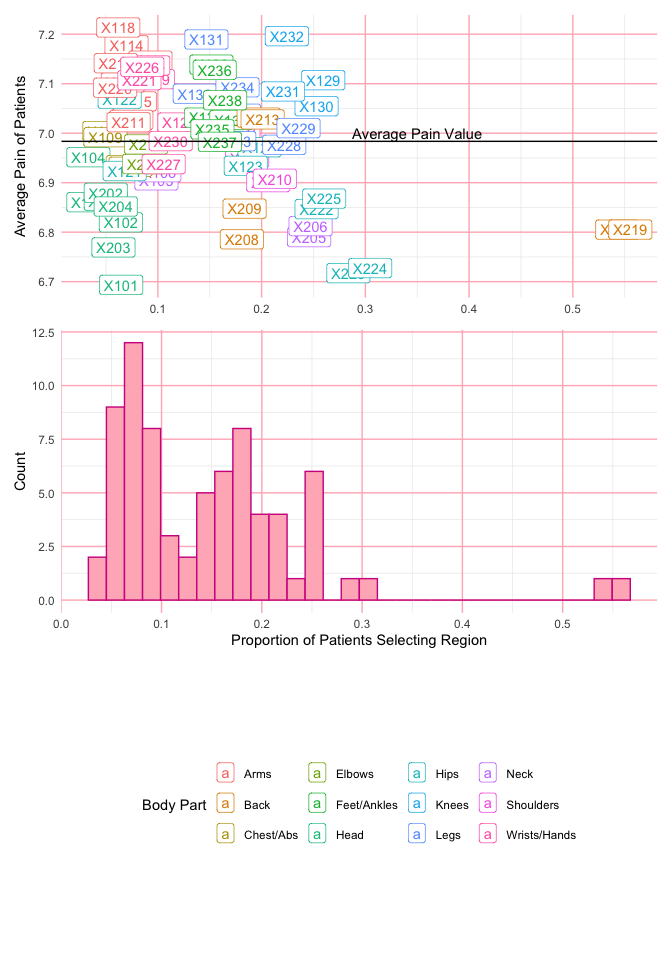

In [ ]:
p1 + p2 + guide_area() + plot_layout(ncol=1, guides = "collect",
                                     axes = "collect")

In [ ]:
ggsave("images/visualization_ggplot/myplot.png", height=10) 

Saving 7 x 10 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

## Exercises

For this chapter’s exercises, use the `covidcases` dataset that we first
introduced in **?@sec-transformations-summaries** to recreate some
plots. These are complex plots, so try to build them up one step at a
time and just try to get as close as possible to the given examples.

1.  Replicate the following combined plot in
    <a href="#fig-covid-heatmap" class="quarto-xref">Figure 3</a>, which
    shows the weekly COVID-19 cases in the U.S. as well as the weekly
    cases by U.S. division. Hint: use the `scale_color_gradientn()`
    function to replicate the color scale.

<figure id="fig-covid-heatmap">
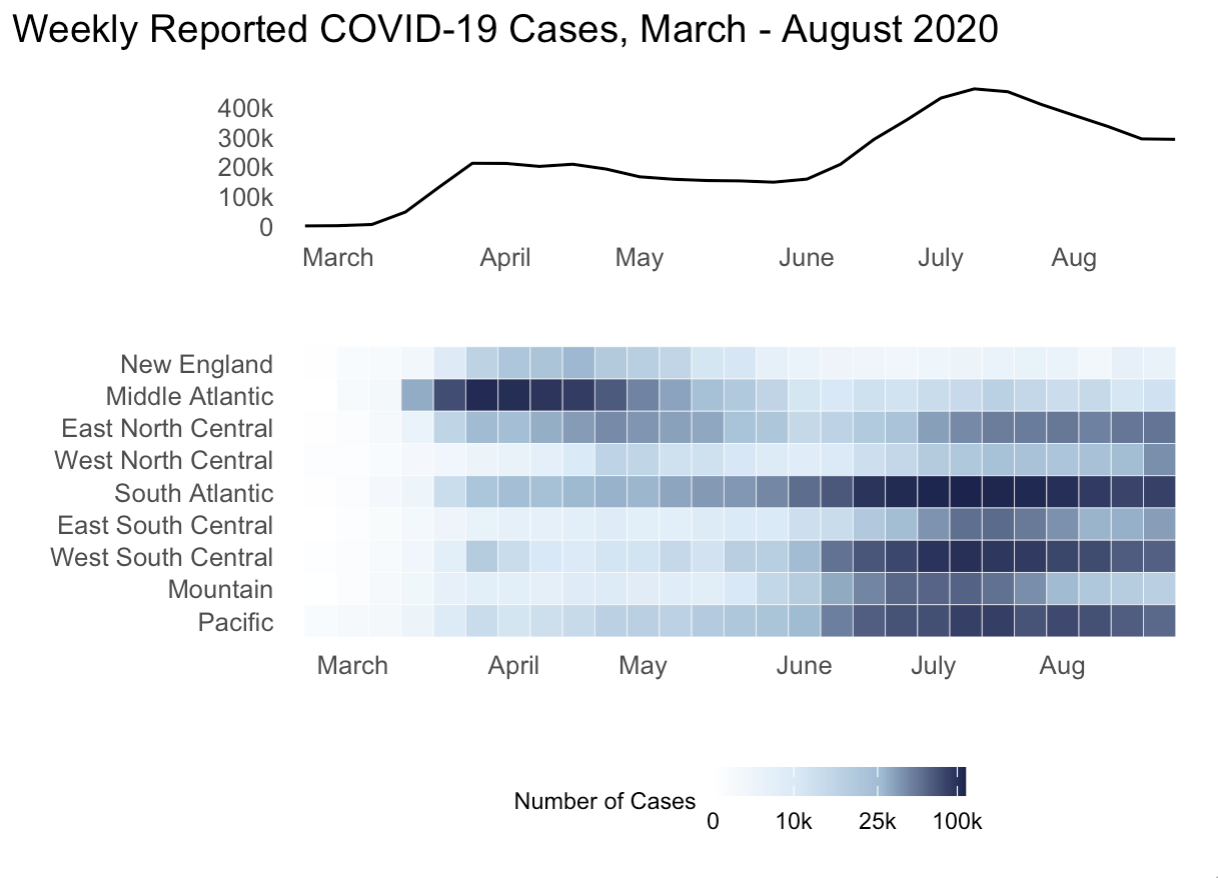
<figcaption>Figure 3: COVID-19 Cases Over Time by State.</figcaption>
</figure>

1.  Replicate the plot in
    <a href="#fig-covid-area-chart" class="quarto-xref">Figure 4</a>,
    which is a stacked area chart for the total deaths from COVID-19 in
    the states with the top ten total death counts overall.

<figure id="fig-covid-area-chart">
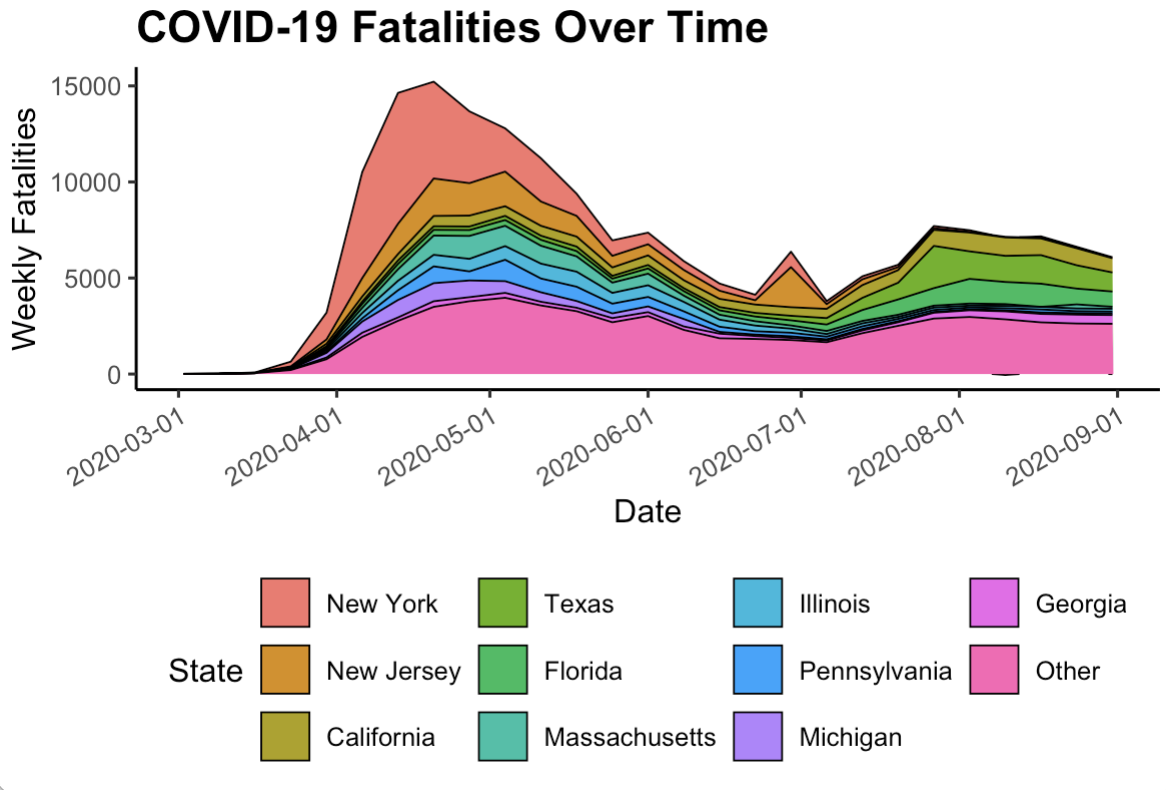
<figcaption>Figure 4: COVID-19 Cases Over Time by State.</figcaption>
</figure>